In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn

from sklearn.preprocessing import MinMaxScaler
from datetime import date, timedelta, datetime
import matplotlib.dates as mdates
import math

In [8]:
#symbol and time period
symbol = 'ETH-USD'
start_date = '2022-01-01'
end_date = '2023-01-01'

#Download
eth_data = yf.download(symbol, start=start_date, end=end_date)

#Feature selection
features = ['Open', 'High', 'Low', 'Volume']
X = eth_data[features]
y = eth_data['Close']

#Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(np.array(y).reshape(-1, 1))

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


[*********************100%%**********************]  1 of 1 completed


In [9]:
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float()
y_test = torch.from_numpy(y_test).float()

In [12]:
#sequential model, 5 to 32 to 64 to 16 to 8 to 1
seq_model = nn.Sequential(nn.Linear(4,128),
                        nn.ReLU(),
                        nn.Linear(128,64),
                        nn.ReLU(),
                        nn.Linear(64,32),
                        nn.ReLU(),
                        nn.Linear(32,16),
                        nn.ReLU(),
                        nn.Linear(16,8),
                        nn.ReLU(),
                        nn.Linear(8,4),
                        nn.ReLU(),
                        nn.Linear(4,1),
                        nn.LogSoftmax(dim = 1)
                        )

In [17]:
#model training for 100 epochs

import torch.optim as optim
optimizer = optim.SGD(seq_model.parameters(),lr =0.0001)
epochs = 1000
MSE = nn.MSELoss()

for epoch in range(1, epochs + 1):
      Y_train_pred = seq_model(X_train)
      train_loss = MSE(Y_train_pred, y_train)

      y_val_pred = seq_model(X_test)
      val_loss = MSE(Y_val_pred, y_test)

      optimizer.zero_grad()
      train_loss.backward()
      optimizer.step()

print('Train loss: ', train_loss,'Val loss: ', val_loss)

Train loss:  tensor(0.1850, grad_fn=<MseLossBackward0>) Val loss:  tensor(0.2466, grad_fn=<MseLossBackward0>)


RuntimeError: ignored

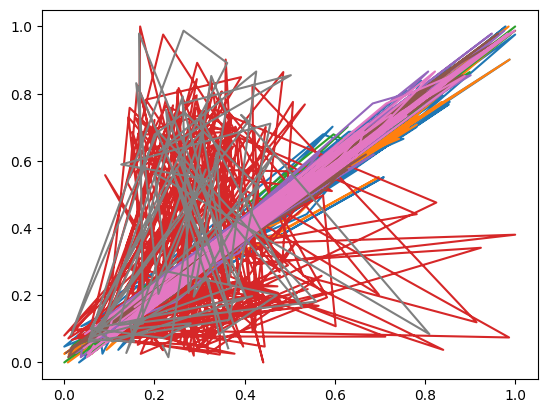

In [20]:
plt.plot(X_train,y_train)
plt.plot(X_test,y_test)
plt.plot(X_test,y_val_pred)

RuntimeError: ignored

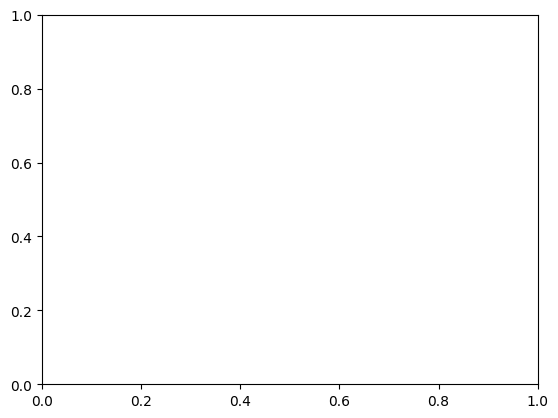

In [19]:
plt.plot(epochs,val_loss)